In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("out/data.csv")
df['StartTime'] = pd.to_datetime(df['StartTime'])
df.head()

,ID,StartTime,Duration_ns,ConnDuration_ns,DialDuration_ns,DNSDuration_ns,Status,StatusCode,Error
0,GET /,2024-02-12 12:50:58+01:00,338865000,187818875,146996875,40262209,200 OK,200,NaN
1,GET /,2024-02-12 12:50:58+01:00,342826542,188442916,147601250,40228166,200 OK,200,NaN
2,GET /,2024-02-12 12:50:58+01:00,343047959,187695292,146739750,40384542,200 OK,200,NaN
3,GET /,2024-02-12 12:50:58+01:00,484274459,333713000,292769375,40259625,200 OK,200,NaN
4,GET /anything,2024-02-12 12:50:58+01:00,296632375,147367458,145465667,1757708,200 OK,200,NaN


In [25]:
for col in df.columns:
    if col.endswith('_ns'):
        ms_col = col.replace('_ns','_ms')
        df[ms_col] = df[col]/1000000

In [26]:
df.groupby(['ID','StatusCode']).agg({'Duration_ms':['count','mean','std']})

Duration_ms                       
                               count        mean        std
ID            StatusCode                                   
GET /         200                250  323.028653  81.280930
GET /anything 200                250  317.777309  80.649955
PUT /anything 200                249  323.931283  98.166572

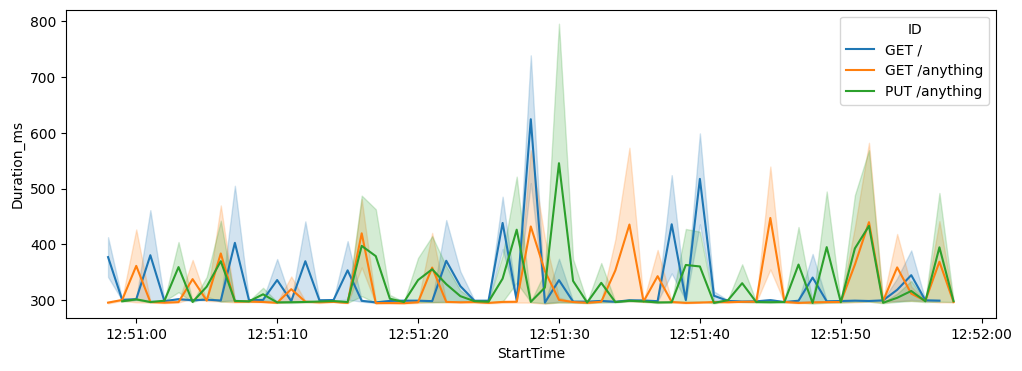

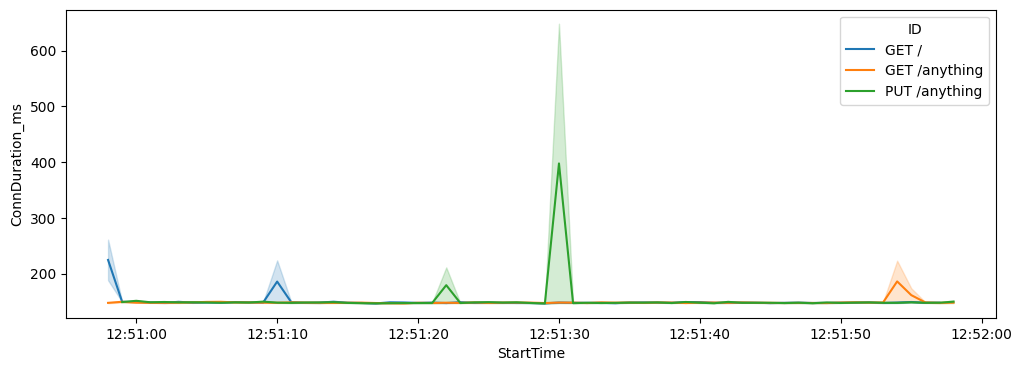

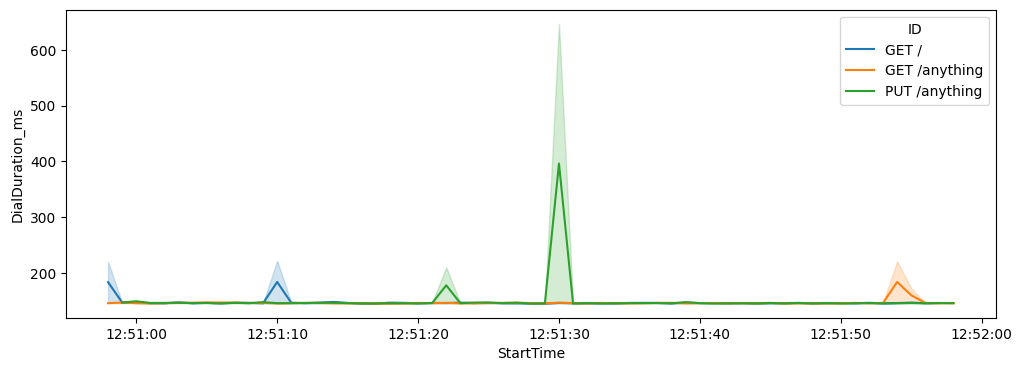

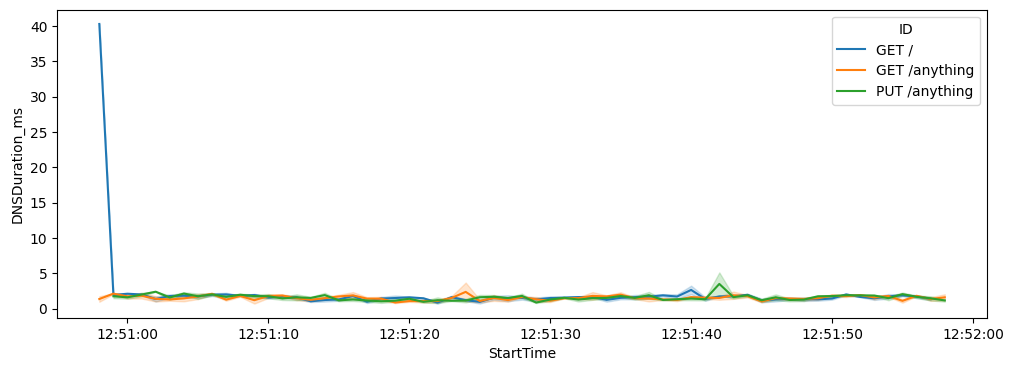

In [27]:
for col in df.columns:
    if col.endswith('_ms'):
        plt.figure(figsize=(12,4))
        sns.lineplot(data=df,x='StartTime',y=col,hue="ID",errorbar='se')
        plt.show()

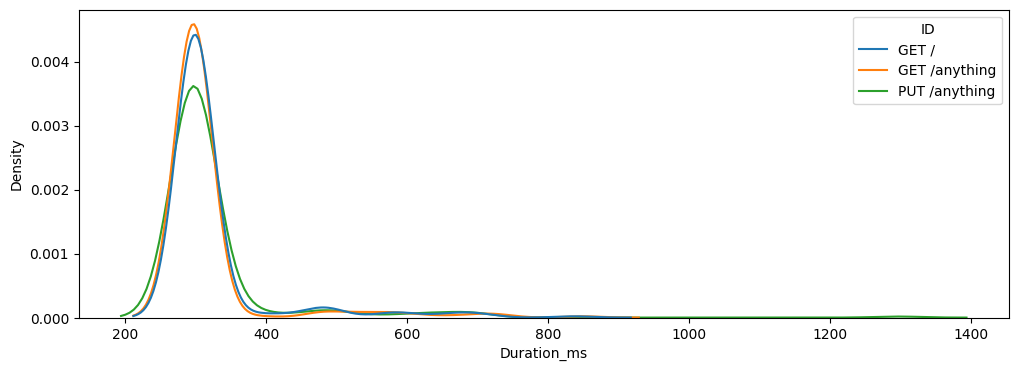

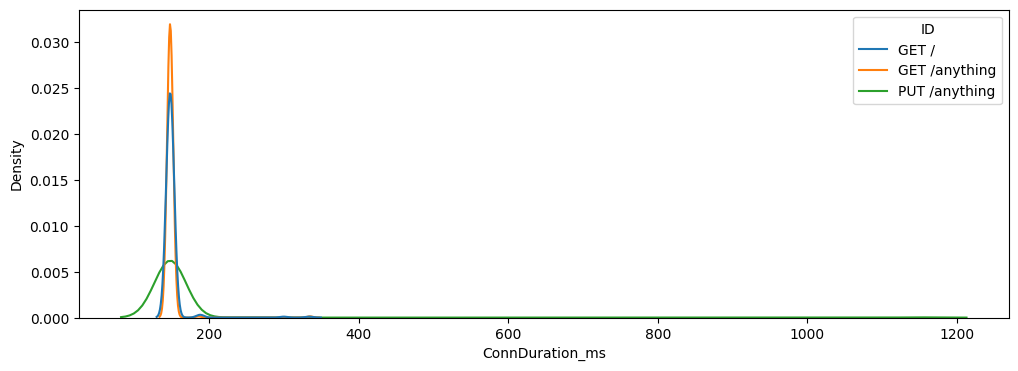

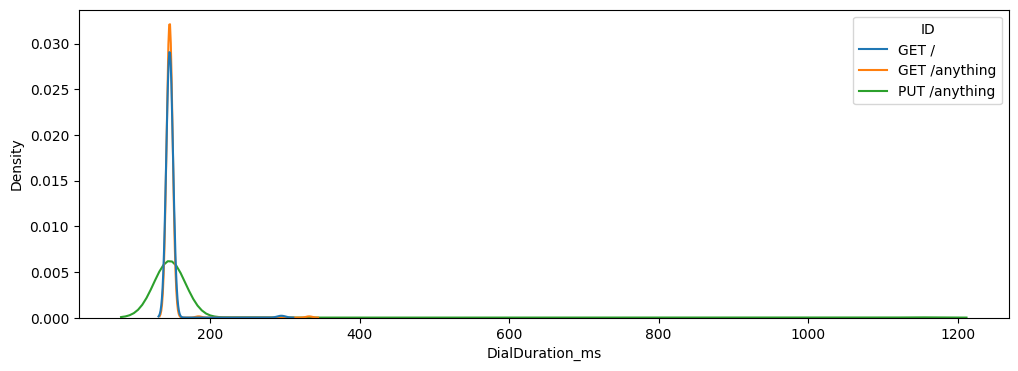

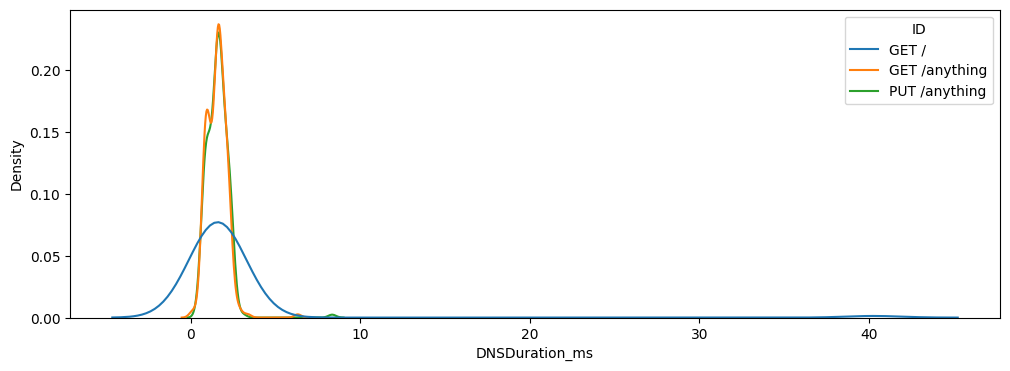

In [28]:
for col in df.columns:
    if col.endswith('_ms'):
        plt.figure(figsize=(12,4))
        sns.kdeplot(data=df,x=col,hue="ID")
        plt.show()